<a href="https://colab.research.google.com/github/jaden-2/Assignment/blob/master/credAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1

#### What kind of company is Home Credit?
###### Home credit is a credit company, they provide loans to individuals. The objective of this company is to increase financial inclusion by intergrating people excluded from accessing credit due to insufficient or non-existent credit histories into their system.


#### What is expected in this competition?
##### The goal of this competition is to develop a machine learning algorithm or model predict their clients' repayment abilities, thus, increasing finincial inclusion to the population affected by insufficient or non-existent credit histories.

#### What are the benefits companies can gain by predicting this?
###### By predicting the credit worthiness of clients, the company stand to benefit the following:
1.   To increase it's costumer base by including those that would have been excluded from accessing credit

2.  Mitigate losses by extending credit to only individuals that can repay.


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msm

### Problem 2

In [130]:
application_train = pd.read_csv("/content/application_train.csv")

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
application_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [132]:
#description of dataset, showing the count, mean, standard deviation, et. of the dataset.
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [133]:
#checking for missing values
missing = application_train.isnull().sum()

print(missing.head(50))

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

<Axes: >

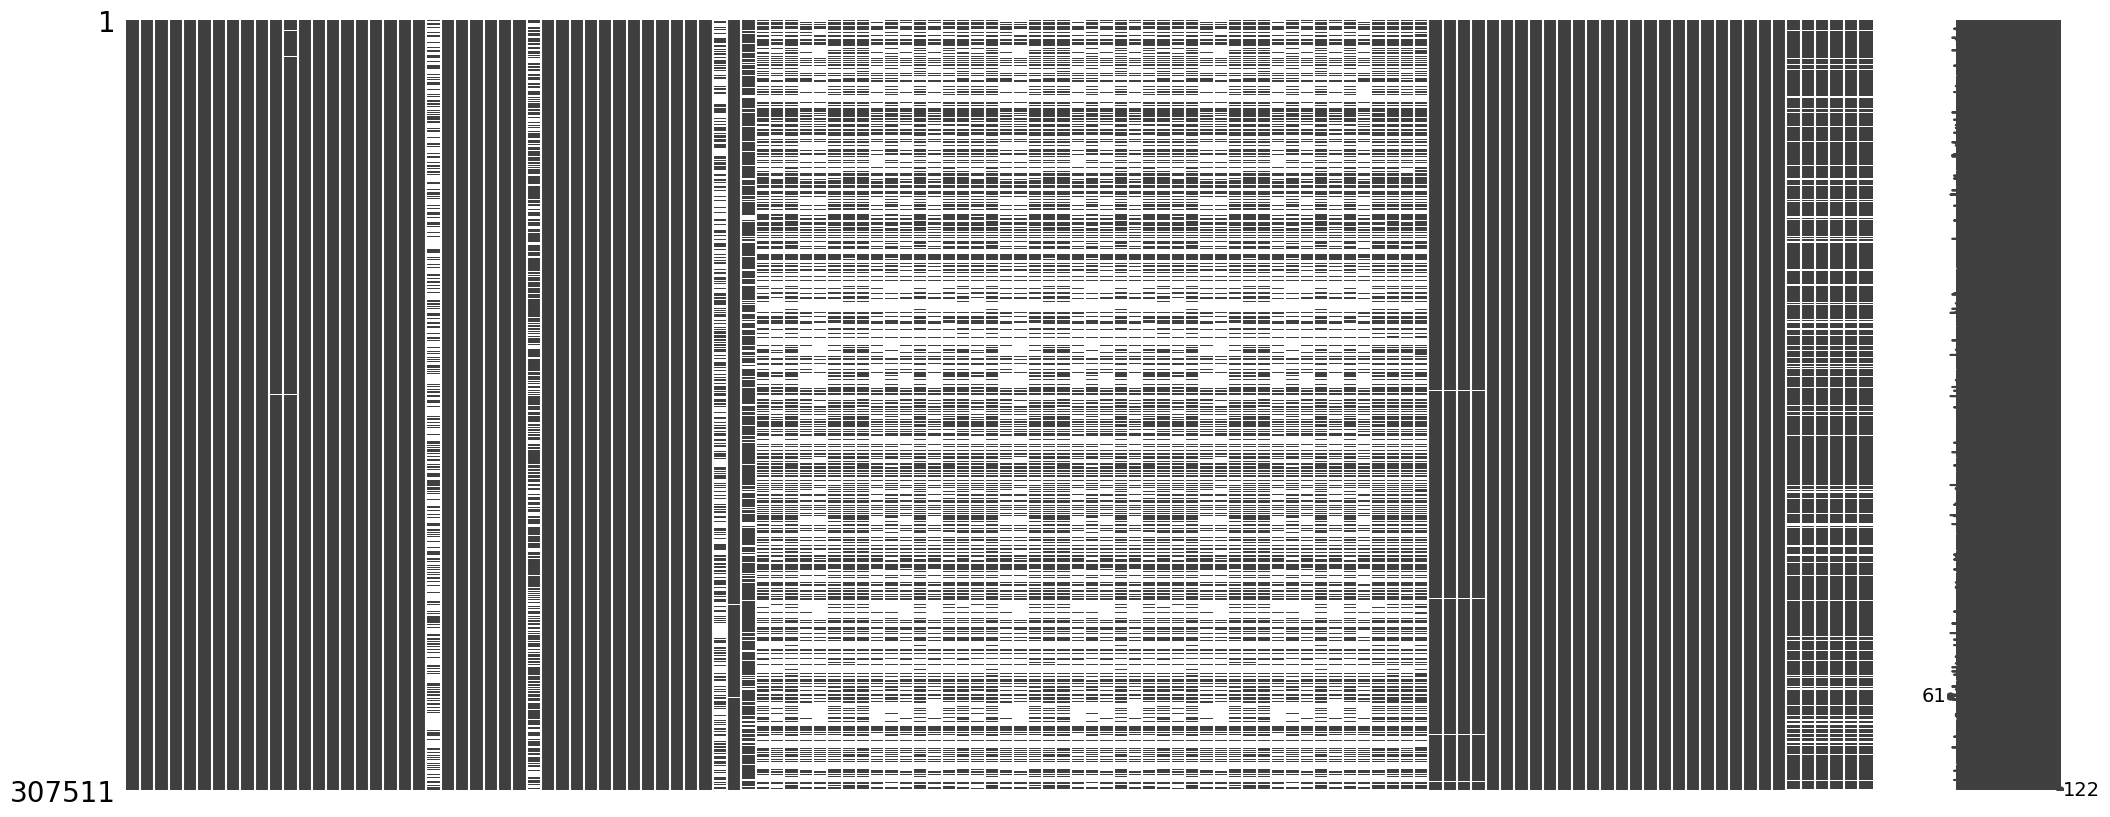

In [134]:
msm.matrix(application_train)

##### By using the missingno library, a matrix representing the fullness of each column is made. This makes it easy to identify features with null values.

Text(0.5, 0.98, 'Missing features (percent)')

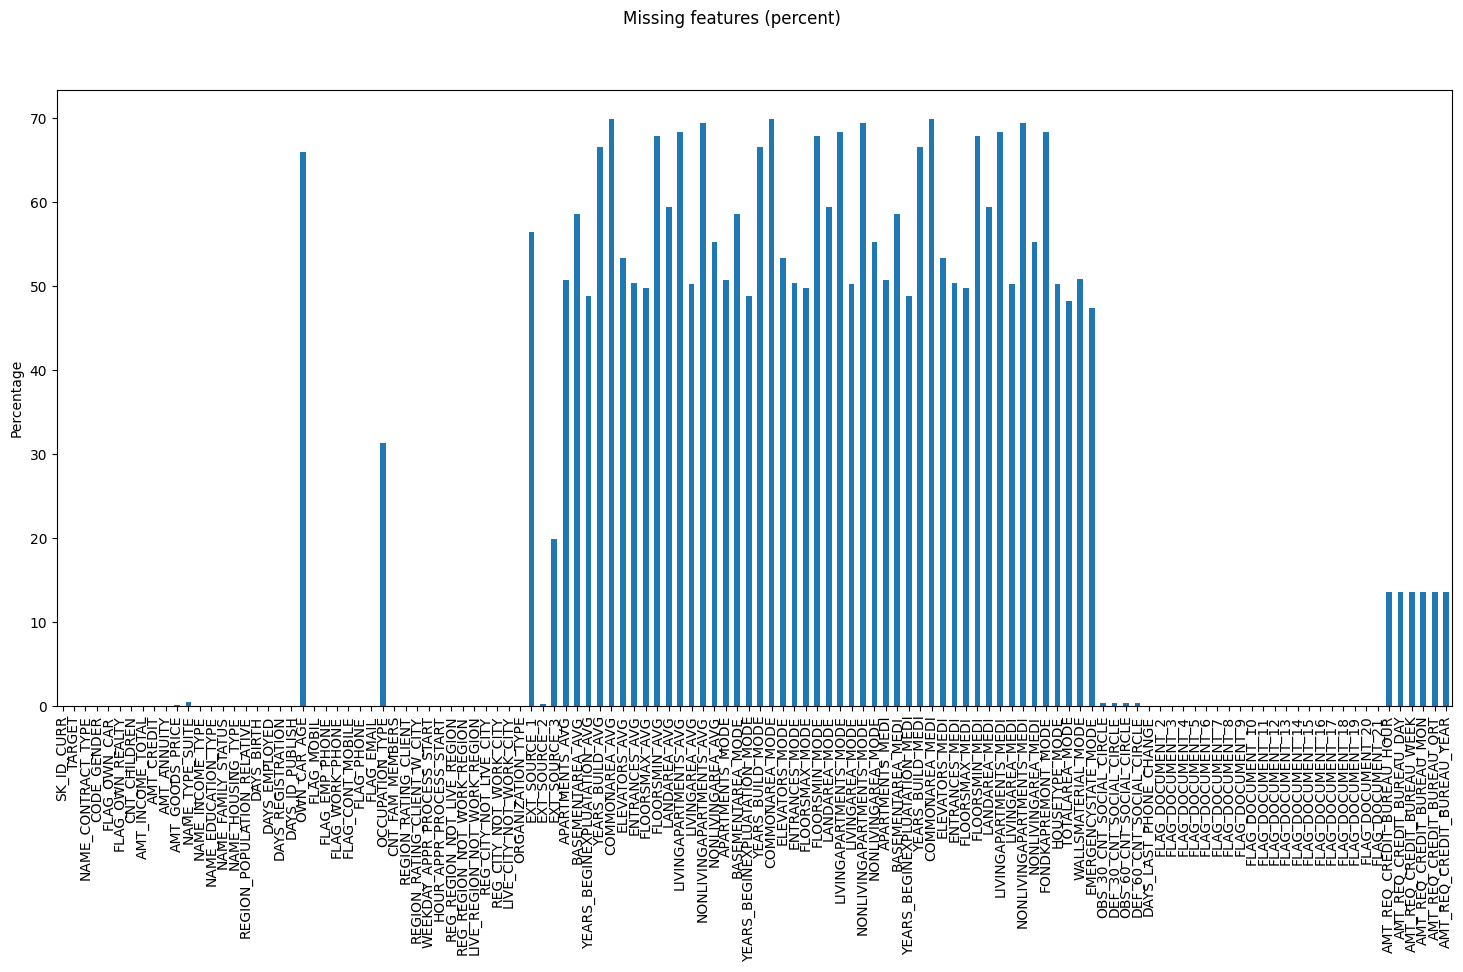

In [135]:
length = len(application_train) #number of rows in each feature
missing = (missing/ length) *100

# graphical representation
fig = plt.figure(figsize=(18, 8))
ax = fig.gca()
missing.plot.bar(ax=ax)
ax.set_ylabel("Percentage")
fig.suptitle("Missing features (percent)")


##### The above shows the percentage of missing values in each feature of the dataset

### Problem 3

1.   What attributes have the most association?
2.   What is the gender ratio of loan application and that of successful repayment?
3.   What types of loans did clients collect?
4.   What is the education level of clients?




#### Problem 4

#### What attributes have the most association?

In [136]:
# droping features with that contain more than 10% of missing values

large_missing_features = missing[missing.round() > 5].index

application_train.drop(large_missing_features, axis=1, inplace=True)

In [137]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

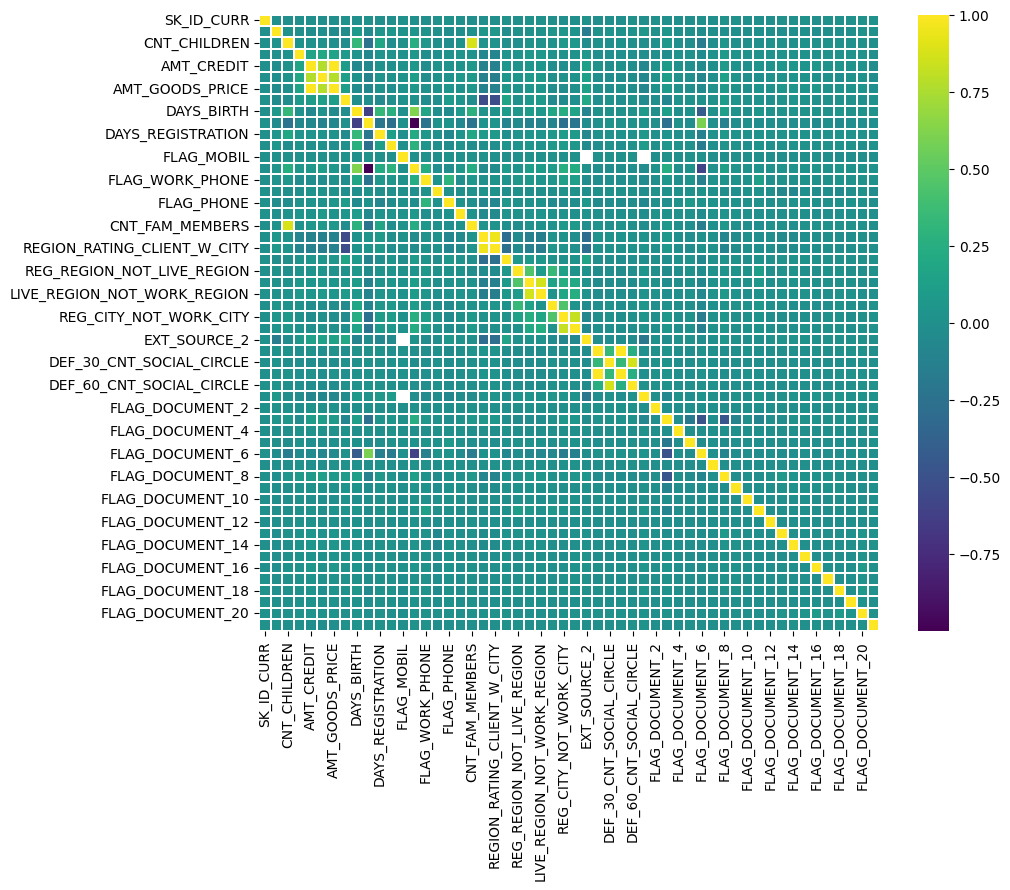

In [138]:
# Finding the correlation matrix of the dataset
import seaborn as sns
corr = application_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="viridis", linecolor="white", linewidths=0.2)

<Axes: >

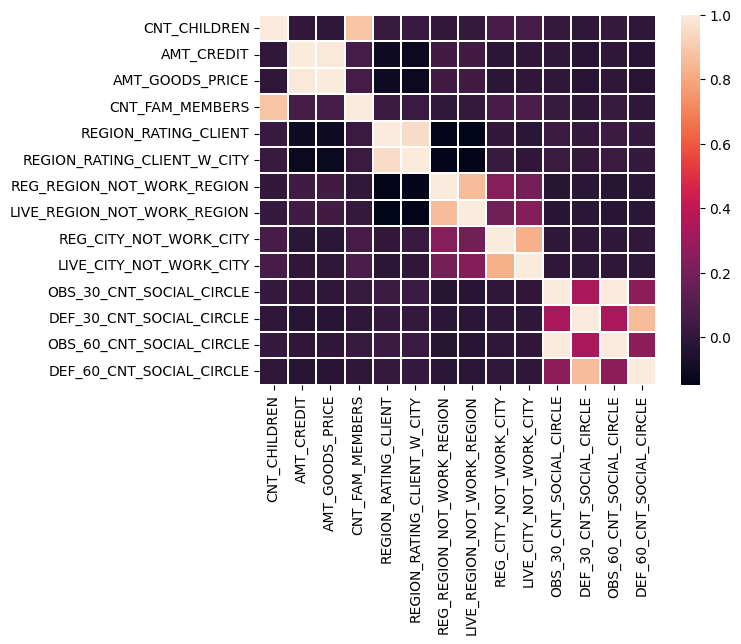

In [139]:
#indentifying features with the most correlation, these would be potentially useful for a regression analysis
def getInterest(df, threshold=0.4):
  """Gets features with the highest correlation"""
  corr = df.corr(numeric_only=True)
  corr.apply(np.abs)
  x = corr >= threshold
  y = corr < 1
  c = x*y
  null_features = corr[c].isna().all()
  #getting features with correlation index greater than or equals to 0.4
  interest = []
  for x in null_features.index:
    if null_features[x] == False:
      interest.append(x)
  return interest

interest = getInterest(application_train, 0.8)
#correlation of interested features
interest_corr = application_train[interest].corr()
sns.heatmap(interest_corr, linecolor="white", linewidths=0.2)

In [140]:
factors = getInterest(application_train[interest], 0.85)

print(f"Features with the most association include \n \r{factors}")



Features with the most association include 
['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


#### What is the gender ratio of loan application and that of successful repayment?

Text(0.5, 0.98, 'Male to female loan relationship')

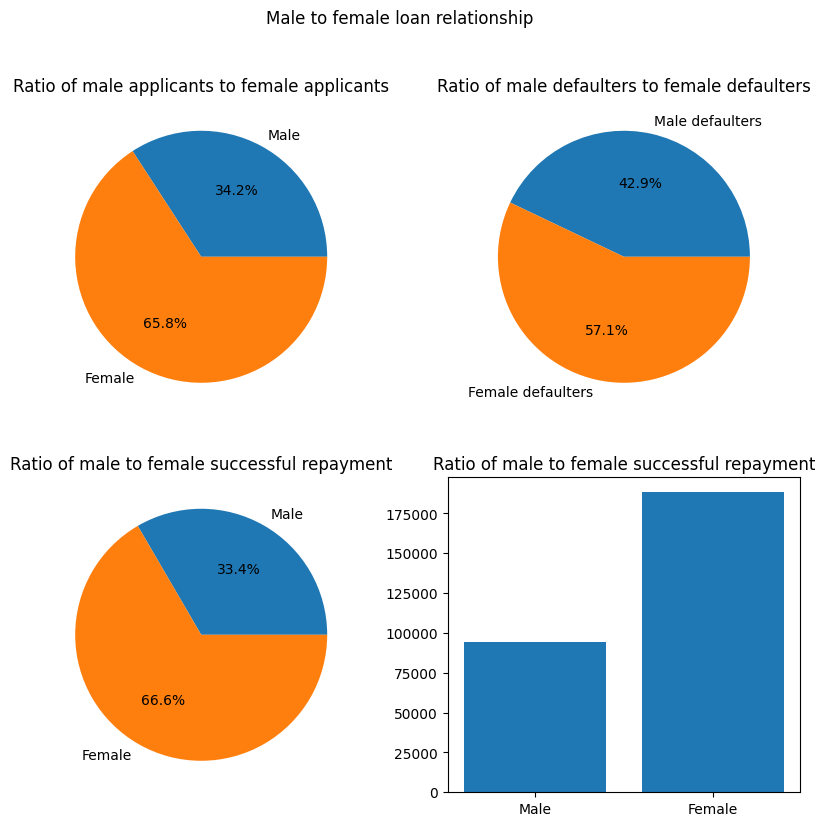

In [141]:

application_train.head()

male = application_train.query("CODE_GENDER == 'M'")
female = application_train.query("CODE_GENDER == 'F'")

male_applicants = male["CODE_GENDER"].count()
female_applicants = female["CODE_GENDER"].count()
total = male_applicants + female_applicants

male_default = male.query("TARGET == 1")["CODE_GENDER"].count()
female_default = female.query("TARGET == 1")["CODE_GENDER"].count()

fig, ax = plt.subplots(2, 2, figsize=(10, 9))

ax[0, 0].pie((male_applicants, female_applicants), labels=["Male", "Female"], autopct='%1.1f%%')
ax[0, 0].set_title("Ratio of male applicants to female applicants")

ax[0, 1].pie((male_default, female_default), labels=["Male defaulters", "Female defaulters"], autopct='%1.1f%%')
ax[0, 1].set_title("Ratio of male defaulters to female defaulters")

ax[1, 0].pie( (male_applicants - male_default, female_applicants - female_default), labels=["Male", "Female"], autopct='%1.1f%%')
ax[1, 0].set_title("Ratio of male to female successful repayment")

ax[1, 1].bar(["Male", "Female"],(male_applicants - male_default, female_applicants - female_default) )
ax[1, 1].set_title("Ratio of male to female successful repayment")

fig.suptitle("Male to female loan relationship")

In [142]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


##### What types of loans did clients collect?

Text(0.5, 1.0, 'Loan types collected by clients')

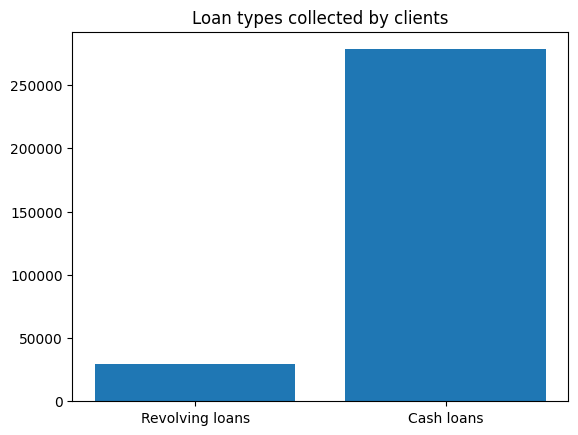

In [143]:
loan_type = list(set(application_train['NAME_CONTRACT_TYPE']))

contracts = dict()
#determine the number of clients that take each type of loan
for loan in loan_type:
  contracts[loan] = application_train.query(f"NAME_CONTRACT_TYPE == '{loan}'")["NAME_CONTRACT_TYPE"].count()



plt.bar(contracts.keys(), contracts.values())
plt.title("Loan types collected by clients")


### What is the education level of clients



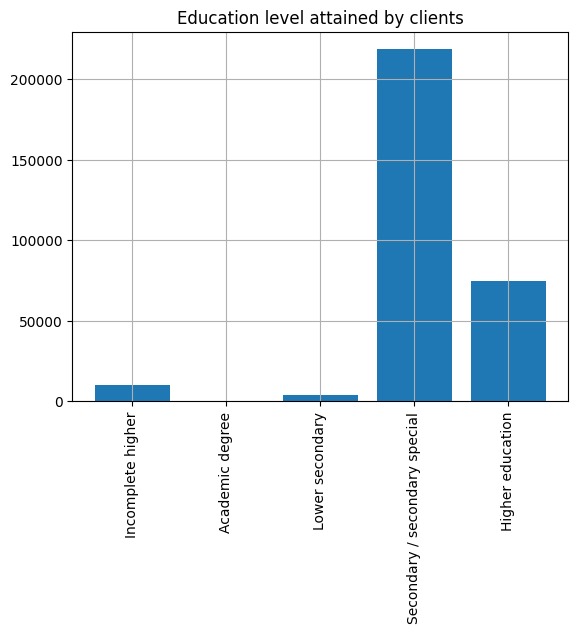

In [144]:
education_types = list(set(application_train['NAME_EDUCATION_TYPE']))

education = dict()
#determine the number of clients that take each type of loan
for edu in education_types:
  education[edu] = application_train.query(f"NAME_EDUCATION_TYPE == '{edu}'")["NAME_EDUCATION_TYPE"].count()


plt.bar(education.keys(), education.values())
plt.grid(True)
plt.xticks(rotation="vertical")
plt.title("Education level attained by clients")
plt.show()